# <center> Analysis of Research Productivity at LSE </center> 

## Table of Contents
1) [Introduction](#intro)
2) [Data Acquisition](#acqui)
3) [Data Manipulation](#mani)
4) [Data Exploration](#exp)
5) [Data Analysis](#ana)
    <br>**5a.** How does research productivity vary across departments?
    <br>**5b.** What are the factors affecting the average productivity? 
    <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Department Size
    <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Research Staff Ratio
    <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Professor Ratio
    <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Dr Ratio
6) [Conclusion](#conc)




## 1 Introduction <a name="intro"></a>

As a social science specialised university, LSE has produced a lot of researches. Within LSE, some deparments, for instance, Economics, are more renowned in the reasearch fields or academia than other departments. Those departments probably have the most abundant research funding assigned from school. However, we believe there certainly should be other departments with great research potentials. We want to investigate the research productivity within LSE across different departments. This might help out school in deciding the allocation of research funding, providing another perspective.

Beside the school, there might be other parties who find this research productivity analysis useful. Potential PhD students who want to join LSE and are deciding between similar departments might want to look at the research productivity of different departments. For example, sociology and anthropology departments can have overlapping research interests; if the PhD students or even professors are deciding between these two departments, they might want to look at the research productivity.

Apart from analyzing the productivity differences across LSE departments, we are also curious about the reasons behind the differences and decide to investigave it. One possible cause of the productivity discrepancy we think of is the proportion of research staff in each department. In this report, we will investigate the general research productivity topic, and develop various subquestions that will help us and the audience to better understand the question.


**note:**

Due to time limitation and considering the complexity of the data acquisition part, we will be focusing on 12 departments:
<br>Social Policy, Anthropology, Finance, Mathematics, Statistics, Psychological and Behavioural Science, International Relations, Management, Sociology, Geography and Environment, Economic History, Government.



## 2 Data Acquisition<a name="acqui"></a>


#### LSE research data acquisition
In order to discuss and explore the research productivity, we have to obtain the information about LSE research, which is available in a LSE research database here: https://eprints.lse.ac.uk/ . While this data can be webscraped, it is already available in JSON format, which is semi-structured and so much easier to convert to a dataframe and manipulate. So we decided just to simply take advantage of the JSON file and extract the information we required.

For simplicity reasons, we ommited the process in this document and provided a separate notebook for the research data acquisition in `Data Acquisition - Publications per Department via JSON.ipynb`. More details can be found in that notebook.


#### LSE department staff data acquisition
Investigating the relationship between research productivity and other department staff factors, the staff information are needed. We decided to use webscraping to obtain the information. Considering that some departments have very different webpage structures, we webscraped 12 departments that are somewhat overall similar. 

For simplicity reasons, we ommited the process in this document and provided a separate notebook for the research data acquisition in `Data Acquisition - Departmental Staff Data via Webscraping.ipynb`. More details can be found in that notebook.

## 3 Data Manipulation<a name="mani"></a>

In [1]:
import pandas as pd
import seaborn as sns

In [48]:
publications.dtypes

Title                         object
Department                    object
Date                          object
Authors                       object
Number of Authors              int64
Number of Authors as Staff     int64
Year                           int64
dtype: object

In [2]:
publications = pd.read_csv("Data/departmental_publications_data.csv")

In [3]:
staff = pd.read_csv("Data/departmental_staff_data.csv")
staff

Name     Department                              Label  \
0         Fabio Battaglia  Social Policy                     Academic staff   
1     Liam Beiser-McGrath  Social Policy                     Academic staff   
2          Thomas Biegert  Social Policy                     Academic staff   
3         Tania Burchardt  Social Policy                     Academic staff   
4      Leonidas Cheliotis  Social Policy                     Academic staff   
...                   ...            ...                                ...   
1165         Paul Willman     Management  Other academic and research staff   
1166    Mohamed Abouaziza     Management  Other academic and research staff   
1167        Anushri Gupta     Management  Other academic and research staff   
1168  Philipp Schoenegger     Management  Other academic and research staff   
1169        Oliver Seager     Management  Other academic and research staff   

          Title  Category  
0            Dr  Research  
1            Dr  Research  
2            Dr  Research  
3            Dr  Research  
4            Dr  Research  
...         ...       ...  
1165  Professor  Research  
1166         Dr  Research  
1167         Dr  Research  
1168         Dr  Research  
1169        NaN  Research  

[1170 rows x 5 columns]

In [4]:
staff.describe()

Name  Department           Label Title  Category
count              1169        1170            1170   754      1170
unique             1169          12              49     2         2
top     Fabio Battaglia  Management  Academic staff    Dr  Research
freq                  1         165             243   475       796

In [5]:
sum(staff['Name'].isnull())

1

In [6]:
staff[staff['Name'].isnull()]

Name    Department           Label      Title  Category
83  NaN  Anthropology  Academic staff  Professor  Research

In [7]:
display(staff.Title.value_counts())

Title
Dr           475
Professor    279
Name: count, dtype: int64

In [8]:
sum(staff['Title'].isnull())

416

In [9]:
#departmental_publications_data[departmental_publications_data.duplicated()]

## 4 Data Exploration<a name="exp"></a>

## 5 Data Analysis<a name="ana"></a>

## 4a: For each department, how does the number of publications vary over time?

In [10]:
# categorising date to year
publications['Year'] = publications['Date'].str[-4:].astype(int)
publications.head(3)

Title        Department  \
0  British incomes and property in the early nine...  Economic History   
1           National assistance: service or charity?     Social Policy   
2                                Twelve wasted years     Social Policy   

         Date             Authors  Number of Authors  \
0  01-12-1959     Patrick O'Brien                  1   
1  01-01-1962  Howard Glennerster                  1   
2  01-01-1963  Howard Glennerster                  1   

   Number of Authors as Staff  Year  
0                           1  1959  
1                           1  1962  
2                           1  1963

In [52]:
#creating dataframe for visualization
all_departments = publications['Department'].unique()
all_years = publications['Year'].unique()

cond=publications['Number of Authors']>publications['Number of Authors as Staff']
NoCollab=publications[cond].groupby(['Department', 'Year']).size().reset_index(name='Publications External Collaboration')
TotalPub=publications.groupby(['Department', 'Year']).size().reset_index(name='Total Publications')

DF=pd.DataFrame([(department, year) for department in all_departments for year in all_years],
                                columns=['Department', 'Year'])
DF=pd.merge(DF, TotalPub, on=['Department', 'Year'], how='left')
DF=pd.merge(DF, NoCollab, on=['Department', 'Year'], how='left').fillna(0)

#calculate external collaboration percentage
DF['collaboration prct']=DF['Publications External Collaboration'] / DF['Total Publications']
DF['collaboration prct'].fillna(0,inplace=True)
DF=DF.sort_values(by=['Year','Department'])

#adjusting datatypes
DF['Total Publications']=DF['Total Publications'].astype('int')
DF['Publications External Collaboration']=DF['Publications External Collaboration'].astype('int')
DF

Department  Year  Total Publications  \
384                           Anthropology  1959                   0   
0                         Economic History  1959                   1   
640                                Finance  1959                   0   
512              Geography and Environment  1959                   0   
448                             Government  1959                   0   
..                                     ...   ...                 ...   
767                            Mathematics  2024                  17   
639  Psychological and Behavioural Science  2024                  44   
127                          Social Policy  2024                  29   
319                              Sociology  2024                  18   
383                             Statistics  2024                  15   

     Publications External Collaboration  collaboration prct  
384                                  0.0            0.000000  
0                                    0.0            0.000000  
640                                  0.0            0.000000  
512                                  0.0            0.000000  
448                                  0.0            0.000000  
..                                   ...                 ...  
767                                 15.0            0.882353  
639                                 36.0            0.818182  
127                                 20.0            0.689655  
319                                  5.0            0.277778  
383                                 11.0            0.733333  

[768 rows x 5 columns]

In [12]:
import plotly.express as px


# creating interactive scatter plot
fig = px.scatter(DF, x="collaboration prct", y="Total Publications", height=400,
                 size="Total Publications", color="Department", animation_frame="Year",
                 animation_group="Department", hover_name="Department", size_max=60,
                 range_x=[0, DF['collaboration prct'].max() + 0.3],
                 range_y=[0, DF['Total Publications'].max() + 1],
                 title="Publications by Department and Year")

# adding titles
fig.update_layout(
    xaxis_title="Percentage of Externally Collaborated Publications",
    yaxis_title="Total Publications",
    legend_title="Department",
    title="Publications by Department and Year",
    )

# displaying plot
fig.show()

## 4b: How does research productivity vary across departments?

Based on the exploration and plots on the previous question, we found that some departments have consistently high number of publications, for instance, department of government. This can possibly be due to those departments are of larger sizes and have more staff.

Therefore, instead of looking at the overall publication numbers of each department which are affected by the department sizes, we now decide to focus on the productivity. We use the total number of publications from 2016 till now divided by the total number of department staff as the productivity measure. We decided to use the data from 2016 on because according to the interactive plots the situations get stable since then without significant jumps.


In [13]:
pubs=DF.loc[DF['Year']>=2016,['Department','Year','Total Publications']]
pubs=pubs.groupby('Department')[['Total Publications']].sum().reset_index()
pubs.columns=['Department','Total Publications']
pubs.tail()

Department  Total Publications
7                             Mathematics               503.0
8   Psychological and Behavioural Science               951.0
9                           Social Policy              1229.0
10                              Sociology               523.0
11                             Statistics               519.0

In [14]:
staffsize=staff.groupby('Department')[['Name']].count().reset_index()
staffsize.columns=['Department','Size']
staffsize.tail()

Department  Size
7                             Mathematics    83
8   Psychological and Beahvioural Science   108
9                           Social Policy    76
10                              Sociology    70
11                             Statistics    59

In [15]:
DF2=pubs.merge(staffsize, how='left', on='Department')
DF2.tail()

Department  Total Publications  Size
7                             Mathematics               503.0  83.0
8   Psychological and Behavioural Science               951.0   NaN
9                           Social Policy              1229.0  76.0
10                              Sociology               523.0  70.0
11                             Statistics               519.0  59.0

In [16]:
boolean_result = pubs.loc[8, 'Department'] == staffsize.loc[8, 'Department']
boolean_result

False

In [17]:
DF2.loc[DF2['Department']=='Psychological and Behavioural Science','Size']=108
DF2

Department  Total Publications   Size
0                            Anthropology               386.0   62.0
1                        Economic History               381.0   66.0
2                                 Finance               276.0   95.0
3               Geography and Environment              1182.0  128.0
4                              Government              1186.0  157.0
5                 International Relations               851.0  100.0
6                              Management               973.0  165.0
7                             Mathematics               503.0   83.0
8   Psychological and Behavioural Science               951.0  108.0
9                           Social Policy              1229.0   76.0
10                              Sociology               523.0   70.0
11                             Statistics               519.0   59.0

In [18]:
DF2['Average Productivity']=DF2['Total Publications']/DF2['Size']
DF2

Department  Total Publications   Size  \
0                            Anthropology               386.0   62.0   
1                        Economic History               381.0   66.0   
2                                 Finance               276.0   95.0   
3               Geography and Environment              1182.0  128.0   
4                              Government              1186.0  157.0   
5                 International Relations               851.0  100.0   
6                              Management               973.0  165.0   
7                             Mathematics               503.0   83.0   
8   Psychological and Behavioural Science               951.0  108.0   
9                           Social Policy              1229.0   76.0   
10                              Sociology               523.0   70.0   
11                             Statistics               519.0   59.0   

    Average Productivity  
0               6.225806  
1               5.772727  
2               2.905263  
3               9.234375  
4               7.554140  
5               8.510000  
6               5.896970  
7               6.060241  
8               8.805556  
9              16.171053  
10              7.471429  
11              8.796610

In [19]:
DF2.describe()

Total Publications        Size  Average Productivity
count           12.000000   12.000000             12.000000
mean           746.666667   97.416667              7.783681
std            352.341604   36.071793              3.190900
min            276.000000   59.000000              2.905263
25%            473.750000   69.000000              6.019423
50%            687.000000   89.000000              7.512784
75%           1025.250000  113.000000              8.798847
max           1229.000000  165.000000             16.171053

In [20]:
display(DF2[['Department','Total Publications']].sort_values(by='Total Publications',ascending=False).head())
display(DF2[['Department','Average Productivity']].sort_values(by='Average Productivity',ascending=False).head())

Department  Total Publications
9                          Social Policy              1229.0
4                             Government              1186.0
3              Geography and Environment              1182.0
6                             Management               973.0
8  Psychological and Behavioural Science               951.0

Department  Average Productivity
9                           Social Policy             16.171053
3               Geography and Environment              9.234375
8   Psychological and Behavioural Science              8.805556
11                             Statistics              8.796610
5                 International Relations              8.510000

In [21]:
display(max(DF2['Average Productivity']))
display(min(DF2['Average Productivity']))

16.17105263157895

2.905263157894737

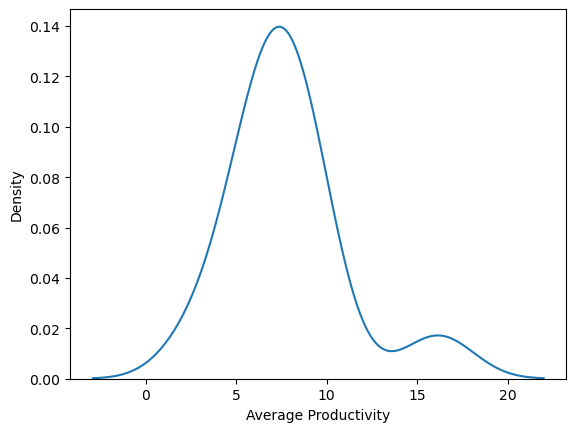

In [22]:
sns.kdeplot(DF2['Average Productivity']);

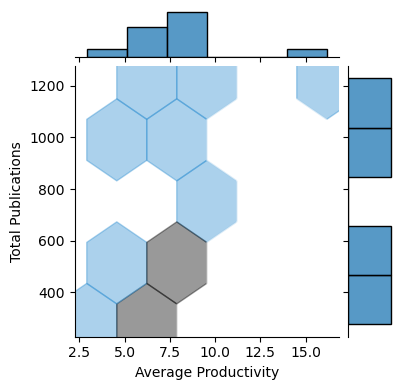

In [23]:
sns.jointplot(data=DF2, x='Average Productivity', y='Total Publications', 
              kind='hex', height=4,alpha=0.4);
#sns.displot(DF2, x='Average Productivity', y='Total Publications', cbar=True,height=3);

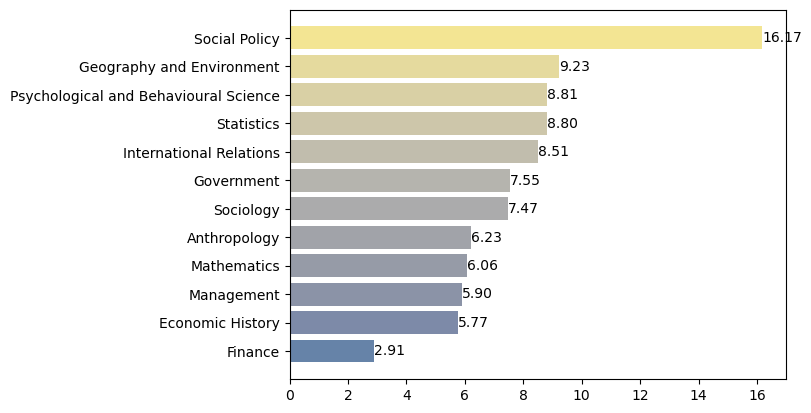

In [24]:
import matplotlib.pyplot as plt

DF2.sort_values(by='Average Productivity',inplace=True)

palette = sns.color_palette("cividis", len(DF2))
#plt.barh(y=DF2.Department, width=DF2['Average Productivity'],alpha=0.6, color=palette);
bars = plt.barh(y=DF2.Department, width=DF2['Average Productivity'], alpha=0.6, color=palette)
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', ha='left', va='center')

plt.show()

## 4c: What are the factors that contribute to making an academic department more productive?

In [25]:
# https://blogs.lse.ac.uk/impactofsocialsciences/2013/06/27/productivity-and-departmental-characteristics/

# 4b: the effect of department size on productivity

# 我觉得之前就应该区分因为只有research staff会产出research（？）- 先核查一下这部分

# Framework调整
# 1. deparment size - productivity 
#   (possible conclusion：管理更好，大家庭 - 部门氛围更好？/ 综合性，field diversity更大，多元化的研究领域能够互相促进，使productivity提升？)
# 2. research staff ratio
# <查一下是不是Prof / Dr都属于research staff的类别>
# 3. Prof ratio
#   (权威人士牵头，使整个部门productivity都更高)
# 4. Dr ratio
#   (Dr-深耕研究领域，Dr个人research productivity超群，因此以一己之力拉高了整个部门的productivity)

The analysis in 4b indicates significant variations in average productivity across different departments. In this part, we aim to delve deeper into the specific factors that could account for these differences, that is, the specific factors that contribute to making an academic department more productive.

(We will continue to utilize data from 2016 to the present for our analysis to maintain consistency.)

#### (1) The Effect of Department Size on Productivity

In [26]:
DF2=DF2.sort_index()

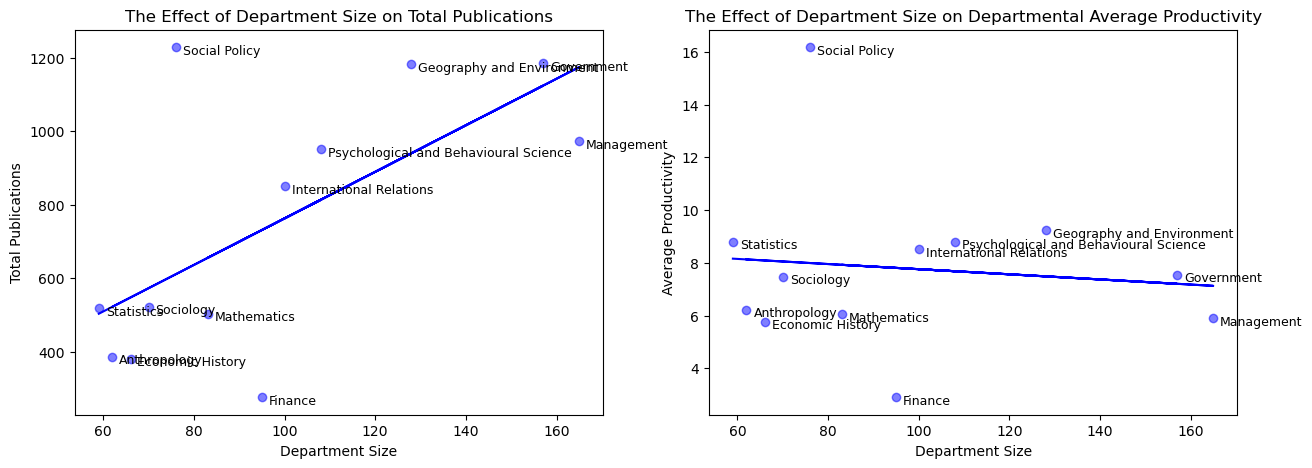

In [27]:
# Create a figure with two subplots
from scipy.stats import linregress

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

titles = ['The Effect of Department Size on Total Publications',
          'The Effect of Department Size on Departmental Average Productivity']
y_labels = ['Total Publications', 'Average Productivity']

# Iterate over the subplots
for i, ax in enumerate(axs):
    # Scatter plot
    ax.scatter(DF2['Size'], DF2[y_labels[i]], color='blue', alpha=0.5)
    ax.set_title(titles[i])
    ax.set_xlabel('Department Size')
    ax.set_ylabel(y_labels[i])

    # Plot trend line
    result = linregress(DF2['Size'], DF2[y_labels[i]])
    slope = result.slope
    intercept = result.intercept
    ax.plot(DF2['Size'], slope * DF2['Size'] + intercept, color='blue')

    # Annotate each point with the department name
    for j, txt in enumerate(DF2['Department']):
        ax.annotate(txt, (DF2['Size'][j], DF2[y_labels[i]][j]), 
                    xytext=(5, -5), textcoords='offset points', fontsize=9)

plt.show()

Based on the above observations, it's evident that while departmental size positively impacts total publications, the productivity per capita diminishes as the department grows larger.<br>
The primary reason for this phenomenon could be attributed to variations in the research staff ratio among different departments. Therefore, the next step in our analysis involves examining the impact of departmental research staff ratio on productivity.

#### (2) The Effect of Departmental Research Staff Ratio on Productivity

Common sense suggests that research productivity is primarily driven by research staff who focus on research rather than teaching or administrative tasks. Therefore, the presence of research staff significantly influences a department's overall productivity. Consequently, departments with a higher ratio of research staff are likely to exhibit greater research productivity.<br>
Following this logic, it provides a plausible explanation for why departments like Management and Government might have high total publications but relatively low average productivity. This phenomenon likely stems from their low research staff ratio, indicating a department less focused on research activities. Consequently, the productivity per capita within these departments tends to be lower compared to departments with a higher research staff ratio.<br>
To disentangle the effect of department size and the actual research staff size, we did some preliminary work to categorize those we believe are engaged in research as "Research" and others as "Non-Research". This classification allows us to analyze the specific contributions of research-focused staff to overall departmental productivity.<br>
In addition to the internal factors affecting departmental average productivity, we also consider external effects. A department with a higher research staff ratio likely reflects a greater emphasis on the research field within that department. This heightened focus on research could potentially inspire non-research staff to become more involved in research activities. Consequently, this increased interest in research among non-research staff could contribute to enhancing overall departmental productivity.

In [28]:
research_staff=pd.merge(
    staff[staff['Category']=='Research'].groupby('Department').size().reset_index(name='Research Staff Size'),
    DF2,on='Department'
)

# Calculate research staff ratio
research_staff['Research Staff Ratio']=(research_staff['Research Staff Size']/research_staff['Size']).round(2)
research_staff=research_staff[['Department','Total Publications','Average Productivity','Size','Research Staff Ratio']]
research_staff

Department  Total Publications  Average Productivity  \
0                Anthropology               386.0              6.225806   
1            Economic History               381.0              5.772727   
2                     Finance               276.0              2.905263   
3   Geography and Environment              1182.0              9.234375   
4                  Government              1186.0              7.554140   
5     International Relations               851.0              8.510000   
6                  Management               973.0              5.896970   
7                 Mathematics               503.0              6.060241   
8               Social Policy              1229.0             16.171053   
9                   Sociology               523.0              7.471429   
10                 Statistics               519.0              8.796610   

     Size  Research Staff Ratio  
0    62.0                  0.92  
1    66.0                  0.65  
2    95.0                  0.41  
3   128.0                  0.59  
4   157.0                  0.68  
5   100.0                  0.75  
6   165.0                  0.64  
7    83.0                  0.59  
8    76.0                  0.75  
9    70.0                  0.79  
10   59.0                  0.86

In [29]:
#Plot heatmap
#plt.figure(figsize=(5, 3))
#sns.heatmap(research_staff[['Size', 'Research Staff Ratio', 'Average Productivity']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Department Size vs Research Staff Ratio vs Average Productivity')
#plt.show()

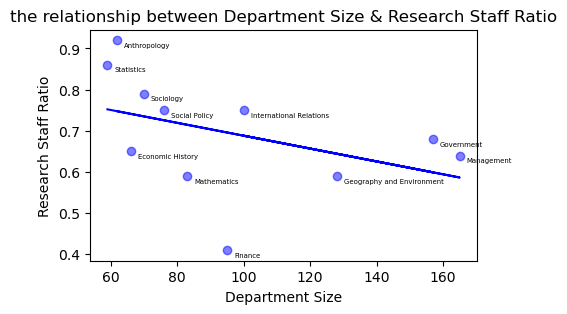

In [30]:
from scipy.stats import linregress

plt.figure(figsize=(5, 3))
plt.scatter(research_staff['Size'],research_staff['Research Staff Ratio'],color='blue',alpha=0.5)
plt.title('the relationship between Department Size & Research Staff Ratio')
plt.xlabel('Department Size')
plt.ylabel('Research Staff Ratio')

# Plot trend line
result=linregress(research_staff['Size'],research_staff['Research Staff Ratio'])
slope=result.slope
intercept=result.intercept
plt.plot(research_staff['Size'], slope*research_staff['Size']+intercept,color='blue')

# Annotate each point with the department name to clearly see the result
for i, txt in enumerate(research_staff['Department']):
    plt.annotate(txt, (research_staff['Size'][i], research_staff['Research Staff Ratio'][i]), 
                 xytext=(5, -5), textcoords='offset points',fontsize=5)
plt.show()

The results are consistent with our hypothesis that as department size increases, the research staff ratio tends to decrease.

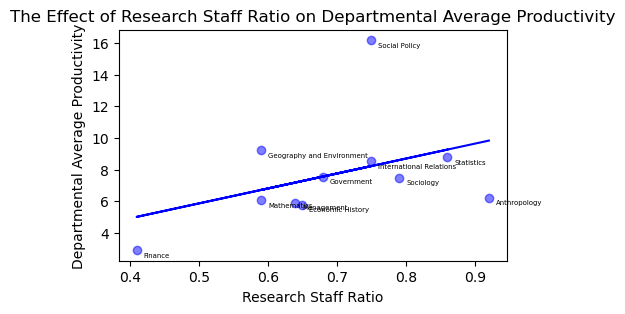

In [31]:
plt.figure(figsize=(5, 3))
plt.scatter(research_staff['Research Staff Ratio'], research_staff['Average Productivity'], color='blue', alpha=0.5)
plt.title('The Effect of Research Staff Ratio on Departmental Average Productivity')
plt.xlabel('Research Staff Ratio')
plt.ylabel('Departmental Average Productivity')

# Plot trend line
result=linregress(research_staff['Research Staff Ratio'], research_staff['Average Productivity'])
slope=result.slope
intercept=result.intercept
plt.plot(research_staff['Research Staff Ratio'], slope*research_staff['Research Staff Ratio']+intercept, color='blue')

# Annotate each point with the department name to clearly see the result
for i, txt in enumerate(research_staff['Department']):
    plt.annotate(txt, (research_staff['Research Staff Ratio'][i], research_staff['Average Productivity'][i]), 
                 xytext=(5, -5), textcoords='offset points', fontsize=5)

plt.show()

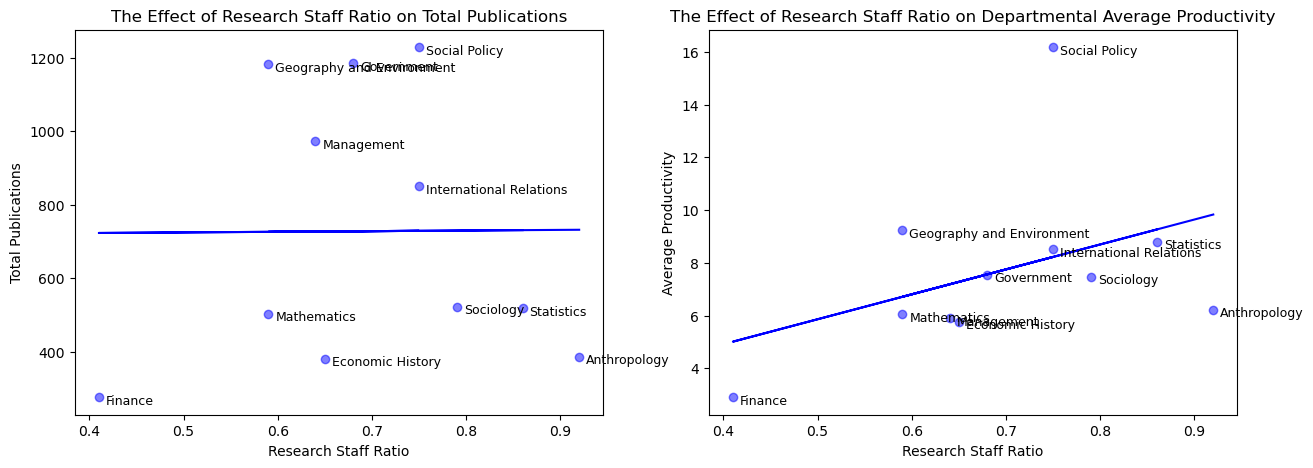

In [32]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

titles = ['The Effect of Research Staff Ratio on Total Publications',
          'The Effect of Research Staff Ratio on Departmental Average Productivity']
y_labels = ['Total Publications', 'Average Productivity']

# Iterate over the subplots
for i, ax in enumerate(axs):
    # Scatter plot
    ax.scatter(research_staff['Research Staff Ratio'], research_staff[y_labels[i]], color='blue', alpha=0.5)
    ax.set_title(titles[i])
    ax.set_xlabel('Research Staff Ratio')
    ax.set_ylabel(y_labels[i])

    # Plot trend line
    result = linregress(research_staff['Research Staff Ratio'], research_staff[y_labels[i]])
    slope = result.slope
    intercept = result.intercept
    ax.plot(research_staff['Research Staff Ratio'], slope * research_staff['Research Staff Ratio'] + intercept, color='blue')

    # Annotate each point with the department name
    for j, txt in enumerate(research_staff['Department']):
        ax.annotate(txt, (research_staff['Research Staff Ratio'][j], research_staff[y_labels[i]][j]), 
                    xytext=(5, -5), textcoords='offset points', fontsize=9)

plt.show()

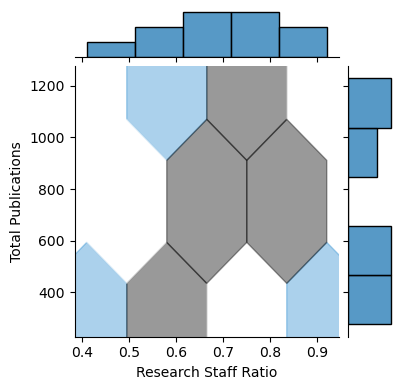

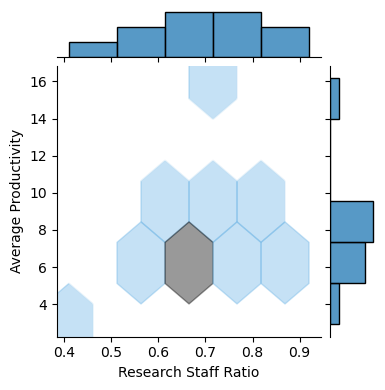

In [33]:
sns.jointplot(data=research_staff, x='Research Staff Ratio', y='Total Publications', 
              kind='hex', height=4,alpha=0.4);
sns.jointplot(data=research_staff, x='Research Staff Ratio', y='Average Productivity', 
              kind='hex', height=4,alpha=0.4);

#### (3) the effect of departmental Professor ratio & Dr ratio on productivity

In [34]:
# Filter the staff DataFrame to include staff who are professors or doctors
filtered_staff=staff[staff['Title'].isin(['Professor', 'Dr'])]
titles=['Professor', 'Dr']

# Initialize an empty DataFrame to store the final results
DF3=research_staff.copy()

# Loop through the titles
for title in titles:
    title_size=filtered_staff[filtered_staff['Title']==title].groupby('Department').size().reset_index(name=f'{title} Size')
    DF3=DF3.merge(title_size, on='Department', how='left')
    if f'{title} Size' in DF3.columns:
        DF3[f'{title} Ratio']=(DF3[f'{title} Size']/DF3['Size']).round(2)

DF3=DF3[['Department','Total Publications','Average Productivity','Size','Research Staff Ratio']+[f'{title} Ratio' for title in titles]]

DF3

Department  Total Publications  Average Productivity  \
0                Anthropology               386.0              6.225806   
1            Economic History               381.0              5.772727   
2                     Finance               276.0              2.905263   
3   Geography and Environment              1182.0              9.234375   
4                  Government              1186.0              7.554140   
5     International Relations               851.0              8.510000   
6                  Management               973.0              5.896970   
7                 Mathematics               503.0              6.060241   
8               Social Policy              1229.0             16.171053   
9                   Sociology               523.0              7.471429   
10                 Statistics               519.0              8.796610   

     Size  Research Staff Ratio  Professor Ratio  Dr Ratio  
0    62.0                  0.92             0.29      0.60  
1    66.0                  0.65             0.35      0.29  
2    95.0                  0.41             0.18      0.31  
3   128.0                  0.59             0.18      0.23  
4   157.0                  0.68             0.27      0.38  
5   100.0                  0.75             0.21      0.48  
6   165.0                  0.64             0.22      0.39  
7    83.0                  0.59             0.30      0.27  
8    76.0                  0.75             0.29      0.46  
9    70.0                  0.79             0.24      0.61  
10   59.0                  0.86             0.27      0.54

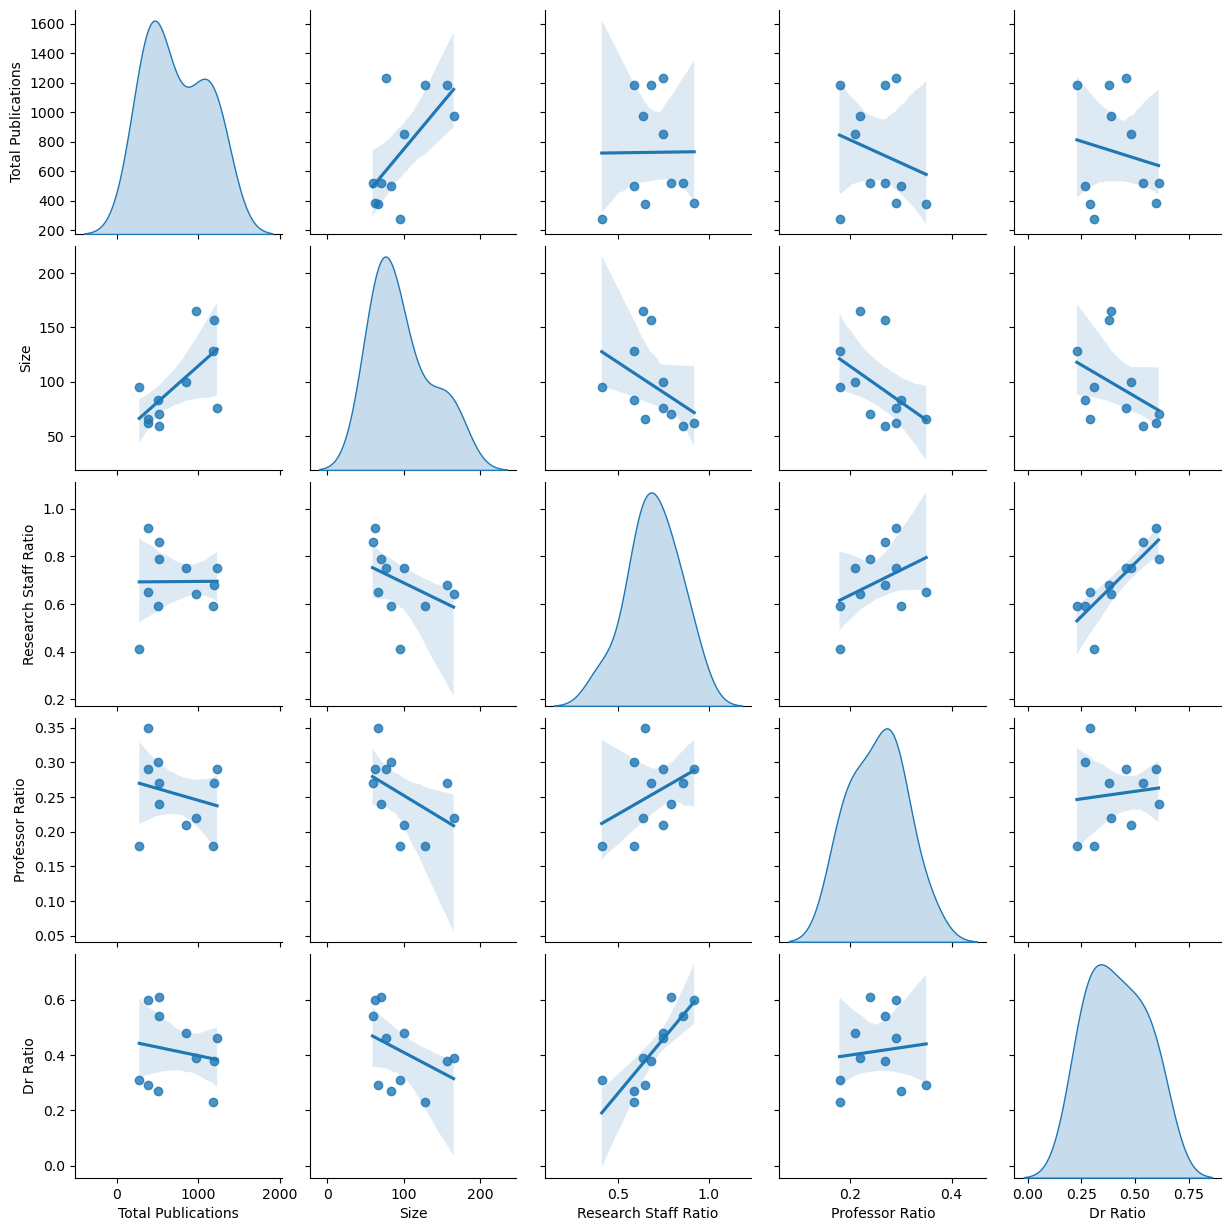

In [47]:
import warnings
warnings.filterwarnings('ignore')

sns.pairplot(DF3[['Total Publications', 'Size', 'Research Staff Ratio', 'Professor Ratio', 'Dr Ratio']],
             kind='reg', diag_kind='kde')

<Figure size 500x500 with 0 Axes>

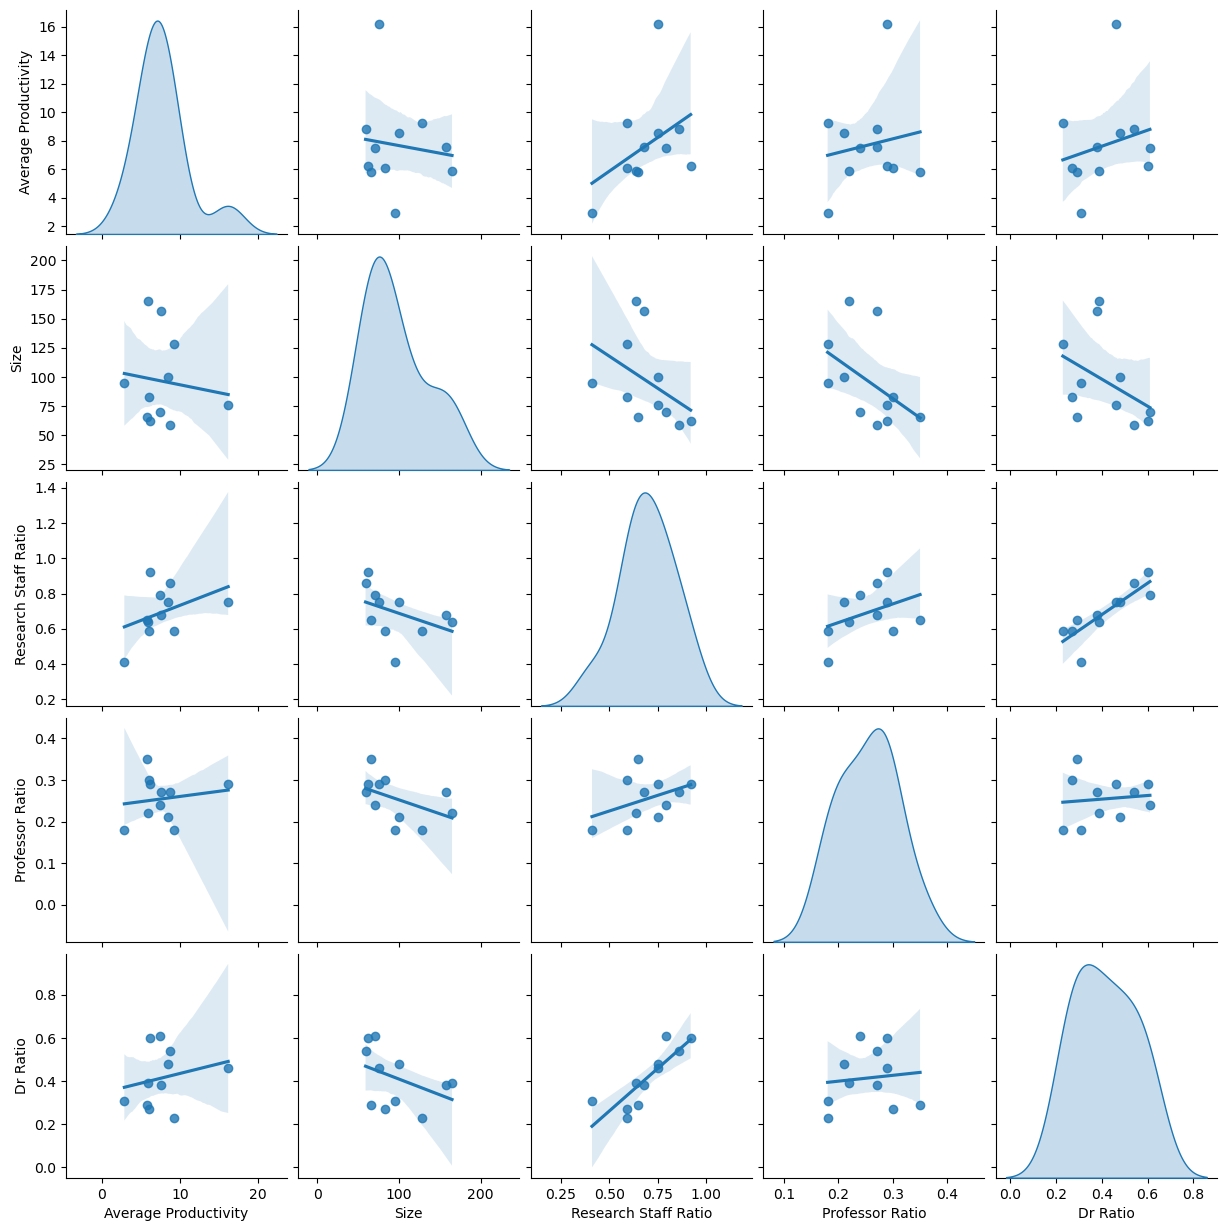

In [36]:
plt.figure(figsize=(5, 5))
sns.pairplot(DF3[['Average Productivity', 'Size', 'Research Staff Ratio', 'Professor Ratio', 'Dr Ratio']],
             kind='reg', diag_kind='kde')

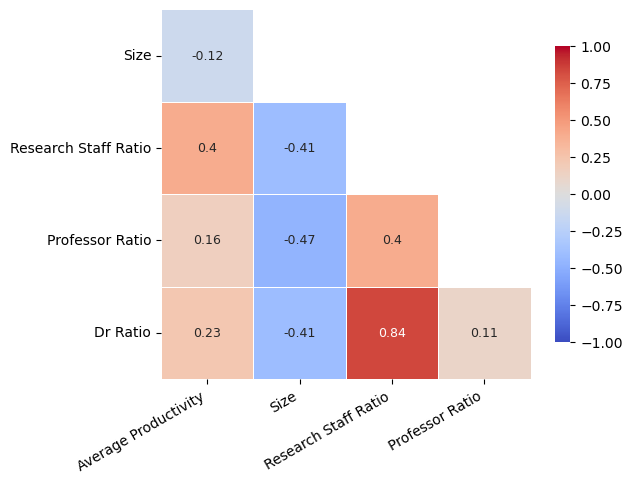

In [37]:
import numpy as np
corrMatrix=DF3[['Average Productivity', 'Size', 'Research Staff Ratio', 'Professor Ratio', 'Dr Ratio']].corr().round(2)
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))[1:,:-1]
sns.heatmap(corrMatrix.iloc[1:,:-1], mask=mask, vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=.5,
            annot=True, square=True, annot_kws={"fontsize":9}, cbar_kws={"shrink":.8})
plt.xticks(rotation=30, ha='right');

We observe a negative correlation between Departmental Overall Productivity and Department Size, while Research Staff Ratio, Professor Ratio, and Dr Ratio show positive correlations.

* (1) We hypothesize that a larger department size implies a more extensive and comprehensive department, with higher management standards and a more diverse research field. This could potentially enhance the research productivity of staff, especially research staff, thereby increasing departmental overall productivity.<br> However, data indicates that lower department size corresponds to lower departmental overall productivity. This is because larger departments have a greater number of Non-Research Staff, leading to a decrease in the research staff ratio (as confirmed by the analysis in (1)), consequently resulting in a decline in departmental overall productivity. If our hypothesis holds, it suggests that the impact of research staff ratio on departmental overall productivity is more significant, while the promotional effect of departmental size on departmental overall productivity is relatively weak and partially offset.<br>If we wish to further investigate the influence of department size on departmental overall productivity, we need to control for research staff ratio. From the data, we can visually observe that for the Department of Government and Economic History, both departments have approximately the same research staff ratio. However, the department size of the Department of Government is significantly larger than that of Economic History, and the average productivity of the Department of Government is also significantly higher than that of Economic History.

In [38]:
display(DF3.loc[[1, 4], ['Department', 'Average Productivity', 'Size', 'Research Staff Ratio']])

Department  Average Productivity   Size  Research Staff Ratio
1  Economic History              5.772727   66.0                  0.65
4        Government              7.554140  157.0                  0.68

Based on basic econometrics, we conducted a multivariate regression of Average Productivity on Department Size and Research Staff Ratio. This is our econometric model:<br>
$$ Average Productivity = \alpha + \beta \times Size + \gamma \times Research Staff Ratio + \varepsilon $$

In [39]:
from sklearn import linear_model

X = DF3[['Size', 'Research Staff Ratio']]
y = DF3['Average Productivity']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[4.98168471e-03 9.99696748e+00]


The results indicate that, holding fixed Research Staff Ratio, increasing department size by 1 unit (person) is associated with a slight increase in average departmental overall productivity by $4.48326874 \times 10^{-3}$. Consequently, after disentangling the effects of size and research staff ratio, it appears that a larger scale does contribute, albeit minimally, to a more academically productive department, supporting our initial hypothesis.

## 6 Conclusion<a name="conc"></a>